In [71]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date, time
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.dates as mdates

In [72]:
visits = pd.read_csv('../Data/cleaned/visits_cleaned.csv')

# Análisis de Factores Clave de Éxito en el Parque Estrella de Global Mundo Parks: Perfil de Visitantes, Estrategias de Ingresos y Optimización de Marketing Digital

## INTRODUCCIÓN

Global Mundo Parks es uno de los principales operadores mundiales de parques de ocio regionales y a uno de los pocos con una verdadera presencia global. Con una cartera diversificada que incluye más de 50 centros de entretenimiento (parques temáticos, zoológicos y parques marinos, parques acuáticos, centros de entretenimiento cubiertos y otras atracciones), la compañía cuenta con una presencia significativa en Europa, América y Australia.

### Objetivo del estudio
Este estudio tiene como objetivo analizar en profundidad el parque estrella en ingresos de Global Mundo Parks para identificar los factores clave detrás de su éxito y liderazgo en el mercado. A través de un análisis exhaustivo, se pretende descubrir las características y estrategias que han contribuido a su posición destacada dentro de la multinacional, con el fin de mejorar y optimizar sus estrategias de marketing digital.

<u> El análisis abordará los siguientes aspectos: </u> 

- Análisis detallado de comportamiento de los visitantes, estacionalidad y patrones de ingreso, evaluando tipos de tickets, pases, bonos y promociones para optimizar estrategias de precios y ventas.

- Cambios en el comportamiento del consumidor post-COVID: Evaluación de cómo la pandemia ha influido en las preferencias y comportamientos de compra de los consumidores.

- Impacto de las campañas de paid media: Análisis del rendimiento de las campañas de publicidad pagada, con métricas de retorno de inversión (ROI) por canal y ejemplos de campañas exitosas que han impulsado el reconocimiento y la afluencia al parque.

Tendencias y patrones en las compras online: Identificación de tendencias en ventas de entradas y productos adicionales, además de métricas como el ticket promedio y la tasa de conversión.

### **Comparación de parques en función de su rendimiento económico:** <br>
Hipótesis: Existen diferencias significativas en los ingresos generados por cada parque, en función de su popularidad y ubicación.

In [73]:
#Vamos a ver qué países son los que más beneficio nos dan
countries_total_revenue = visits.groupby('sDesCountry').agg(totalRevenue=('mAmtRevenueTicket', 'sum')).reset_index()
countries_total_revenue = countries_total_revenue.sort_values(by='totalRevenue', ascending=False)

/var/folders/fp/1z3b5cy15gg6y5646dztcdfm0000gn/T/ipykernel_49637/2385309926.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=countries_total_revenue, x='totalRevenue', y='sDesCountry', palette='viridis')


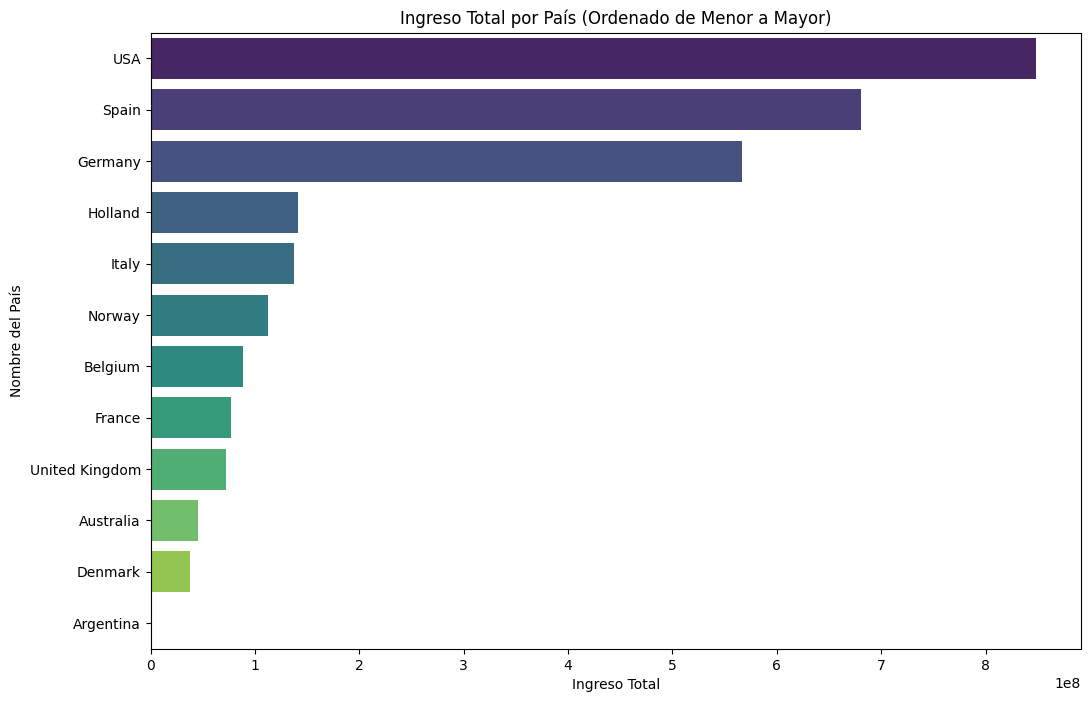

In [74]:
plt.figure(figsize=(12, 8))
sns.barplot(data=countries_total_revenue, x='totalRevenue', y='sDesCountry', palette='viridis')
plt.title('Ingreso Total por País (Ordenado de Menor a Mayor)')
plt.xlabel('Ingreso Total')
plt.ylabel('Nombre del País')
plt.show()

In [75]:
# Crear una tabla donde vamos a poder ver muy fácilmente cada parque que hay en cada país

country_parks_resume = visits.groupby(['sDesCountry', 'sDesSubPark']).agg(totalRevenue=('mAmtRevenueTicket', 'sum')).reset_index()
country_parks_resume = country_parks_resume.sort_values(by=['sDesCountry', 'totalRevenue'], ascending=[True, False])

In [76]:
# Cantidad de parques de cada país, el orden de éxito de cada uno de ellos y el ingreso que han creado en los últimos años
total_revenue_per_country = country_parks_resume.groupby('sDesCountry').agg(totalCountryRevenue=('totalRevenue', 'sum')).reset_index()
total_revenue_per_country = total_revenue_per_country.sort_values(by='totalCountryRevenue', ascending=False)
country_parks_resume = country_parks_resume.sort_values(by=['sDesCountry', 'totalRevenue'], ascending=[True, False])

print("Total Revenue per Country:")
print(total_revenue_per_country)

Total Revenue per Country:
       sDesCountry  totalCountryRevenue
10             USA       848,671,901.68
9            Spain       680,806,313.46
5          Germany       567,074,361.35
6          Holland       140,709,863.89
7            Italy       137,365,962.51
8           Norway       112,682,232.62
2          Belgium        88,845,263.43
4           France        77,110,195.40
11  United Kingdom        72,588,638.21
1        Australia        45,767,258.80
3          Denmark        38,059,371.75
0        Argentina           849,978.44


Podemos ver que en cuanto a ingresos totales, USA va en cabeza con 10 parques de atracciones, siguiéndole España con 9 parques y en tercer lugar tenemos a Alemania con solamente 5 parques en el país.<br>
<br>
Para seguir con el análisis, vamos a seleccionar el parque que más ingresos tenga y vamos a investigar en profundidad las conductas de compra del mismo para averiguar posibles estratégias a futuro.

In [77]:
# Analizar parques con más éxito

parks_performance = visits.groupby(['sDesSubPark', 'sDesCountry']).agg(totalRevenue=('mAmtRevenueTicket', 'sum'),totalTickets=('mNumTicket', 'sum')).reset_index()

In [78]:
parks_performance["sDesSubPark"] = "Parque " + parks_performance["sDesSubPark"].str[:3].str.upper()

In [79]:
# Seleccionar los 10 primeros parques en ingresos
parks_performance = parks_performance.sort_values(by='totalRevenue', ascending=False).head(10)

/var/folders/fp/1z3b5cy15gg6y5646dztcdfm0000gn/T/ipykernel_49637/3789025326.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=parks_performance, x='totalRevenue', y='sDesSubPark', palette='viridis')


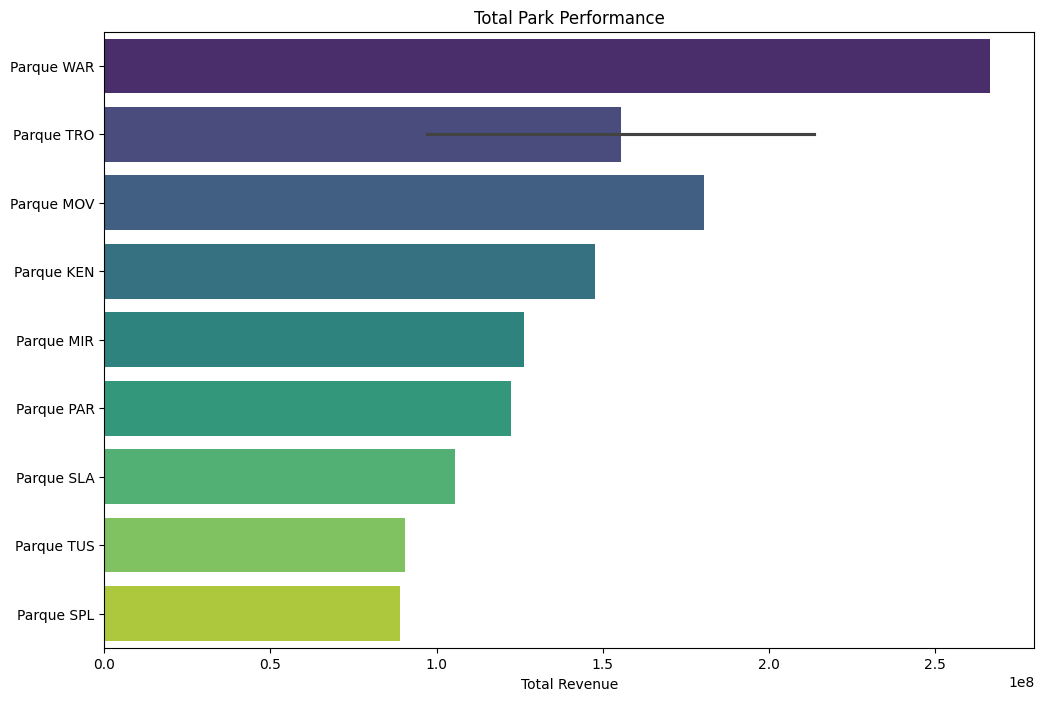

In [80]:
#¿Cuales son los parques estrella por ingresos?
plt.figure(figsize=(12, 8))
sns.barplot(data=parks_performance, x='totalRevenue', y='sDesSubPark', palette='viridis')
plt.title('Total Park Performance')
plt.xlabel('Total Revenue')
plt.ylabel('')

plt.show()

A partir de ahora vamos a seleccionar y estudiar solo el parque **WAR**, creando una metodología que luego sea extrapolable al resto de parques:

In [ ]:
# .csv filtrados por el parque WAR para una mayor agilidad de carga
paidmedia_war = pd.read_csv('../Data/cleaned/paidmedia_war.csv')
visits_war = pd.read_csv('../Data/cleaned/visits_war.csv')

### 1. **Efectos de la estacionalidad en el número de visitantes y los ingresos:**<br>
Hipótesis: Las visitas y los ingresos aumentan durante los meses de vacaciones (junio a agosto, noviembre y diciembre).

In [82]:
# Orden cronológico correcto de los meses.
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

In [131]:
# Crear una tabla con las columnas que nos interesan para demostrar esta hipótesis
# Valores en minus son a causa de descuadre de caja del día en concreto

season_revenue = visits_war[['iNumYear', 'sDesMonth', 'mAmtRevenueTicket']]
print(season_revenue)

       iNumYear sDesMonth  mAmtRevenueTicket
0      2,021.00  December             333.99
1      2,022.00      June           8,046.53
2      2,019.00       May             929.70
3      2,024.00    August          10,562.40
4      2,018.00   October           9,785.94
...         ...       ...                ...
85918  2,018.00  November              57.90
85919  2,018.00      July              28.12
85920  2,024.00       May             179.34
85921  2,019.00     March              52.11
85922  2,021.00    August               5.79

[85923 rows x 3 columns]


In [84]:
season_revenue.loc[:, 'sDesMonth'] = pd.Categorical(season_revenue['sDesMonth'], categories=month_order, ordered=True)

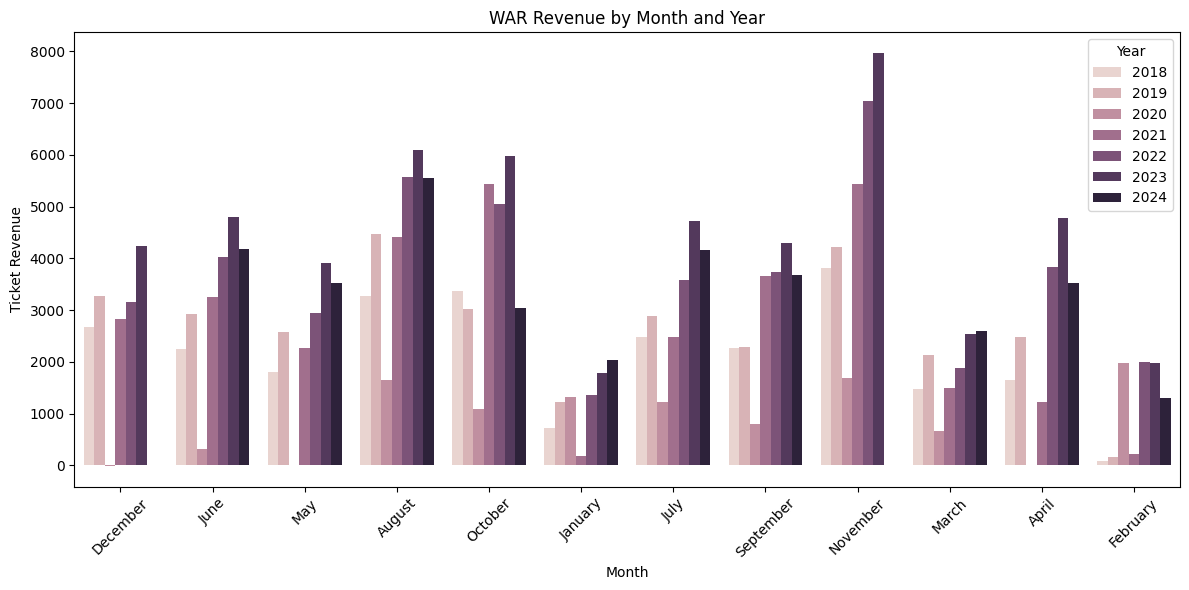

In [85]:
plt.figure(figsize=(12, 6))
sns.barplot(data=season_revenue, x='sDesMonth', y='mAmtRevenueTicket', hue='iNumYear', errorbar=None)
plt.title('WAR Revenue by Month and Year')
plt.legend(title='Year')
plt.ylabel('Ticket Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observamos que los meses de agosto y noviembre presentan un pico de ingresos significativamente superior al resto del año. Además, se destaca la anomalía en los datos del año 2020, marcada por el impacto de la pandemia de COVID-19.

/var/folders/fp/1z3b5cy15gg6y5646dztcdfm0000gn/T/ipykernel_49637/3452397689.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=season_revenue, x='sDesMonth', y='mAmtRevenueTicket', hue='iNumYear', marker='o', ci=None)


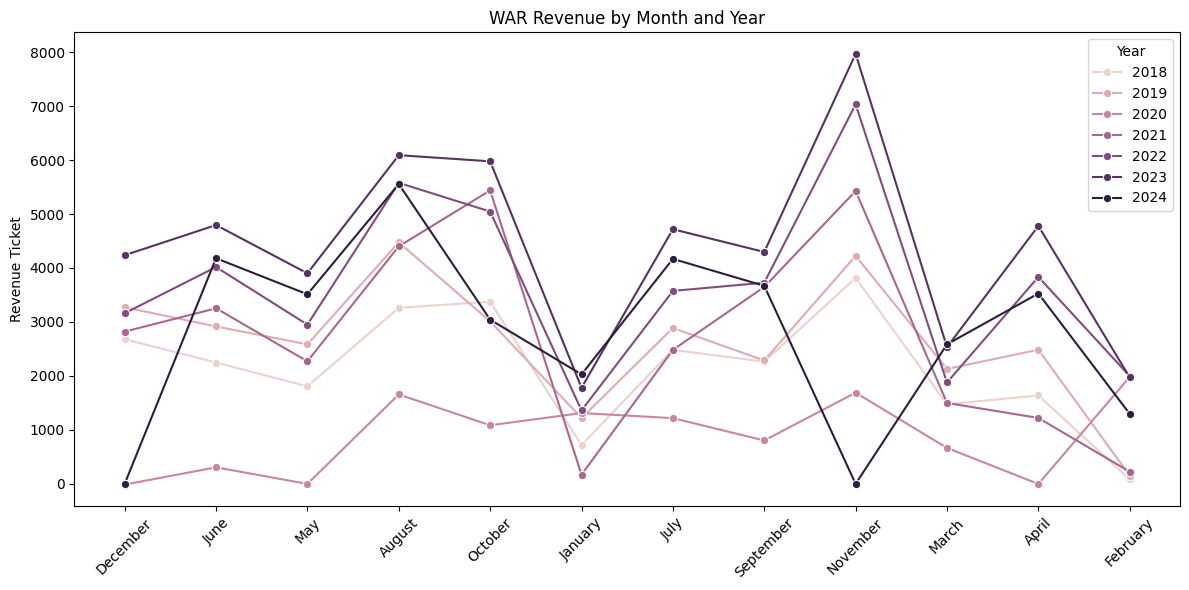

In [86]:
plt.figure(figsize=(12, 6))
# Gráfico de líneas sin sombreado (eliminando el intervalo de confianza)
sns.lineplot(data=season_revenue, x='sDesMonth', y='mAmtRevenueTicket', hue='iNumYear', marker='o', ci=None)
# Títulos y etiquetas
plt.title('WAR Revenue by Month and Year')
plt.xlabel('')
plt.ylabel('Revenue Ticket')
# Leyenda
plt.legend(title='Year')

# Rotar los nombres de los meses
plt.xticks(rotation=45)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### 2. **Impacto del día de la semana en las visitas y los tipos de entradas vendidas:** <br>
Hipótesis: Los fines de semana atraen a más visitantes e impulsan la venta de entradas sin descuento, mientras que los días laborables registran mayores ventas de abonos anuales o de varios días.

In [87]:
# Orden cronológico correcto de los días de la semana
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [88]:
# Seleccionamos las columnas que queremos analizar
day_revenue = visits_war[['iNumYear', 'sDayWeek', 'iNumVisits', 'mNumTicket', 'sDesTicketType']]

In [89]:
# Las organizamos en el orden correcto de los días de la semana
day_revenue['sDayWeek'] = pd.Categorical(day_revenue['sDayWeek'], categories=week_order, ordered=True)

/var/folders/fp/1z3b5cy15gg6y5646dztcdfm0000gn/T/ipykernel_49637/2115527796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_revenue['sDayWeek'] = pd.Categorical(day_revenue['sDayWeek'], categories=week_order, ordered=True)


In [90]:
# Contamos los tickets por día de la semana y tipo de ticket
ticket_counts = day_revenue.pivot_table(index='sDayWeek', columns='sDesTicketType', values='iNumVisits', aggfunc='sum', fill_value=0, observed=False)

Primero vamos a analizar cómo son las ventas de tipo de tickets y qué día de la semana hay más visitas:

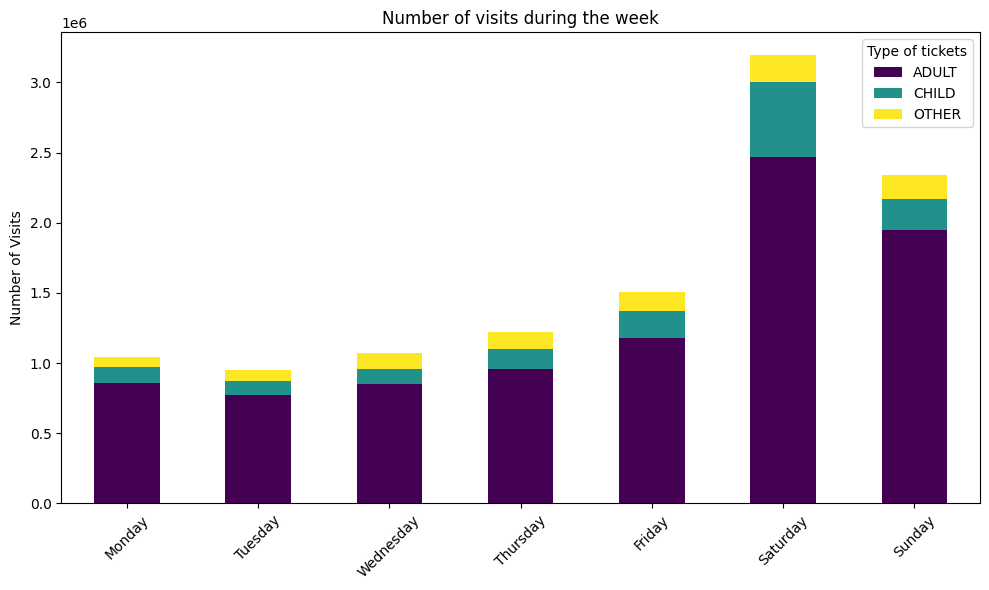

In [91]:
ticket_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
plt.title('Number of visits during the week')
plt.xlabel('')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.legend(title='Type of tickets')
plt.tight_layout()
plt.show()

Procedemos a analizar estos mismos días, por tipo de ticket, para ello tenemos que analizar los diferentes tipos de pases, abonos, etc.

In [92]:
visits_war['sDesSubChannel'].unique()

array(['Main Gate Full Price', 'Main Gate Rest',
       'Web (non promotional codes)', 'Web promotional codes',
       'Promotions - More 40% Discount',
       'Promotions - 25% to 39% Discount',
       'Promotions - Bellow 25% Discount', 'TravelParks',
       'Travel Agents On-line Platforms',
       'Travel Agents Off-line Platforms',
       'Other Intermediaries Off-line Platforms',
       'Other Intermediaries On-line Platforms', 'Groups (All)',
       'Collectives Credits (Off-line)',
       'Collectives Pre-sale (Off-line)', 'Collectives Credits (On-line)',
       'Collectives Pre-sale (On-line)', 'School', 'Events',
       'Others (Off-line)', 'Speedy pass (Off-line)', 'Mazes (Off-line)',
       'Others (On-line)', 'Speedy pass (On-line)', 'Mazes (On-line)',
       'Second Day Free', 'Bronze Annual Pass Visitors',
       'Silver Annual Pass Visitors', 'Gold Annual Pass Visitors',
       'Platino Annual Pass Visitors', 'Rest of gratuities',
       'Basic Annual Pass Visitors', 'S

Tenemos tantas categorías que no podemos visualizar de una forma clara 
la información, por eso vamos a crear categorías Principales:
<br><br>
**Annual Pass:** Incluye todos los tipos de pases anuales (ej. "Annual Pass", "Bronze Annual Pass", "Gold Annual Pass").
<br><br>
**Collectives:** Incluye todo lo que contenga "Collectives" (ej. "Collectives Credits", "Collectives Presales"). 
<br><br>
**Promotions:** Incluye todos los descuentos y promociones (ej. "Promotions - 25% to 39% Discount", "Promotions More 40% Discount").
<br><br>
**Travel Agents:** Agrupa tipos de pases y promociones de agencias de viajes (ej. "Travel Agents Off-line Platforms").
<br><br>
**Full Price Ticket:** Incluye "Main Gate" y variantes de "Web".
<br><br>
**Otros/Rest:** Agrupa los pases de categorías menores o con nombres ambiguos (ej. "Others", "Second Day Free").
<br><br>

In [93]:
conditions = [
    # Pases Anuales (Annual Pass)
    visits_war['sDesSubChannel'].str.contains('Annual Pass', case=False),
    
    # Colectivos (Collectives), ahora incluye 'School'
    visits_war['sDesSubChannel'].str.contains('Collectives|School|Events', case=False),
    
    # Promociones (Promotions), incluyendo Speedy Pass
    visits_war['sDesSubChannel'].str.contains('Promotion|Speedy pass|Flash Sales', case=False),
    
    # Agentes de viajes (Travel Agents)
    visits_war['sDesSubChannel'].str.contains('Travel Agents', case=False),
    
    # Full price ticket (Main Gate & Web)
    visits_war['sDesSubChannel'].str.contains('Main Gate|Web', case=False),
    
    # Otros y Rest (Others/Rest)
    visits_war['sDesSubChannel'].str.contains('Others|Rest|Second Day Free', case=False)
]

categories = [
    'Annual Pass',
    'Collectives',
    'Promotions',
    'Travel Agents',
    'Main & Web',
    'Otros/Rest'
]

In [94]:
# Creamos una nueva columna con Channel Category
visits_war['ChannelCategory'] = np.select(conditions, categories, default='Uncategorized')

In [95]:
# Creamos la tabla con los datos que necesitamos
day_channel_revenue = visits_war[['sDayWeek', 'ChannelCategory', 'mNumTicket']]

In [96]:
# Sumamos la cantidad de entradas vendidas dependiendo del día de la semana y la categoría del tipo de venta
ticket_counts = day_channel_revenue.pivot_table(index='sDayWeek', columns='ChannelCategory', values='mNumTicket', aggfunc='sum', fill_value=0)

In [97]:
# Organizamos los días de la semana
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ticket_counts = ticket_counts.reindex(week_order)

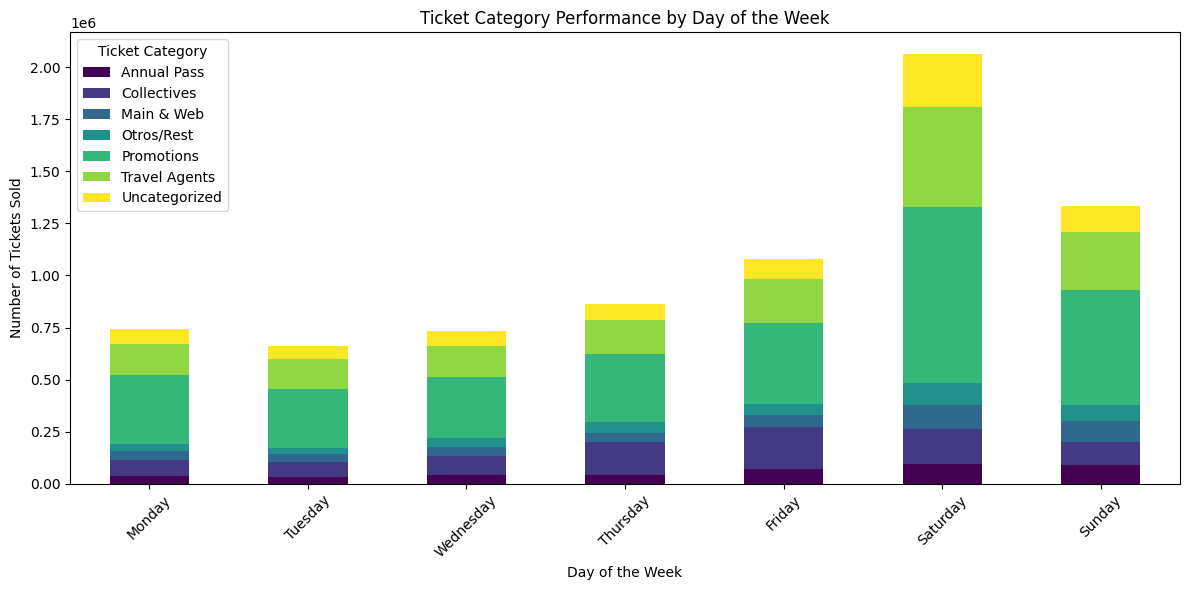

In [98]:
ticket_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="viridis")
plt.title('Ticket Category Performance by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tickets Sold')
plt.xticks(rotation=45)
plt.legend(title='Ticket Category')
plt.tight_layout()
plt.show()

Conclusión: Hemos identificado los días de la semana más favorables para cada categoría de ticket o canal de venta de la siguiente manera:
<br><br>
**Annual Pass:** Los días con mayor venta de abonos anuales son el sábado, domingo y viernes. Contrario a nuestra expectativa, las ventas de esta categoría alcanzan sus picos durante el fin de semana.
<br><br>
**Main Gate & Web:** Este tipo de entradas, vendidas sin descuento, experimenta su mejor rendimiento los sábados, seguido de los domingos. Este patrón está en línea con nuestra hipótesis, que prevé un aumento en la compra de tickets sin descuento durante el fin de semana.
<br><br>
**Promotions:** Las entradas promocionales son las más vendidas a lo largo de toda la semana, destacándose el sábado, donde la cantidad de tickets vendidos se duplica en comparación con los días laborables.

### 3. **Relación entre el precio de la entrada y los ingresos por tipo de entrada:** <br>
Hipótesis: Las entradas con benefícios pero de mayor precio (como los pases anuales) contribuyen más a los ingresos a pesar de venderse en menor cantidad.

In [99]:
# Agrupamos los tipos de canales de venta de tickets junto con la suma de los ingresos de la venta de los tickets y los tickets vendidos.
ticket_summary = visits_war.groupby('ChannelCategory').agg(totalRevenue=('mAmtRevenueTicket', 'sum'),quantitySold=('mNumTicket', 'sum')).reset_index()
ticket_summary = ticket_summary.sort_values(by='totalRevenue', ascending=False)
print(ticket_summary)

  ChannelCategory   totalRevenue  quantitySold
4      Promotions 107,736,151.20  3,023,216.00
0     Annual Pass  74,898,923.69    418,207.60
5   Travel Agents  30,713,143.65  1,574,964.00
1     Collectives  20,068,534.42    875,127.00
6   Uncategorized  18,679,269.01    759,008.00
2      Main & Web  14,416,962.43    443,644.00
3      Otros/Rest       3,037.05    387,371.00


In [100]:
# Calcular el precio del ticket por canal
ticket_summary['ticketPrice'] = ticket_summary['totalRevenue'] / ticket_summary['quantitySold']
print(ticket_summary)


  ChannelCategory   totalRevenue  quantitySold  ticketPrice
4      Promotions 107,736,151.20  3,023,216.00        35.64
0     Annual Pass  74,898,923.69    418,207.60       179.10
5   Travel Agents  30,713,143.65  1,574,964.00        19.50
1     Collectives  20,068,534.42    875,127.00        22.93
6   Uncategorized  18,679,269.01    759,008.00        24.61
2      Main & Web  14,416,962.43    443,644.00        32.50
3      Otros/Rest       3,037.05    387,371.00         0.01


In [101]:
# Excluir 'Otros/Rest' y 'Uncategorized'
ticket_summary_filtered = ticket_summary[(ticket_summary['ChannelCategory'] != 'Otros/Rest') & (ticket_summary['ChannelCategory'] != 'Uncategorized')]

/var/folders/fp/1z3b5cy15gg6y5646dztcdfm0000gn/T/ipykernel_49637/3143698220.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ticket_summary, x='ChannelCategory', y='quantitySold', palette='viridis', ax=ax1)


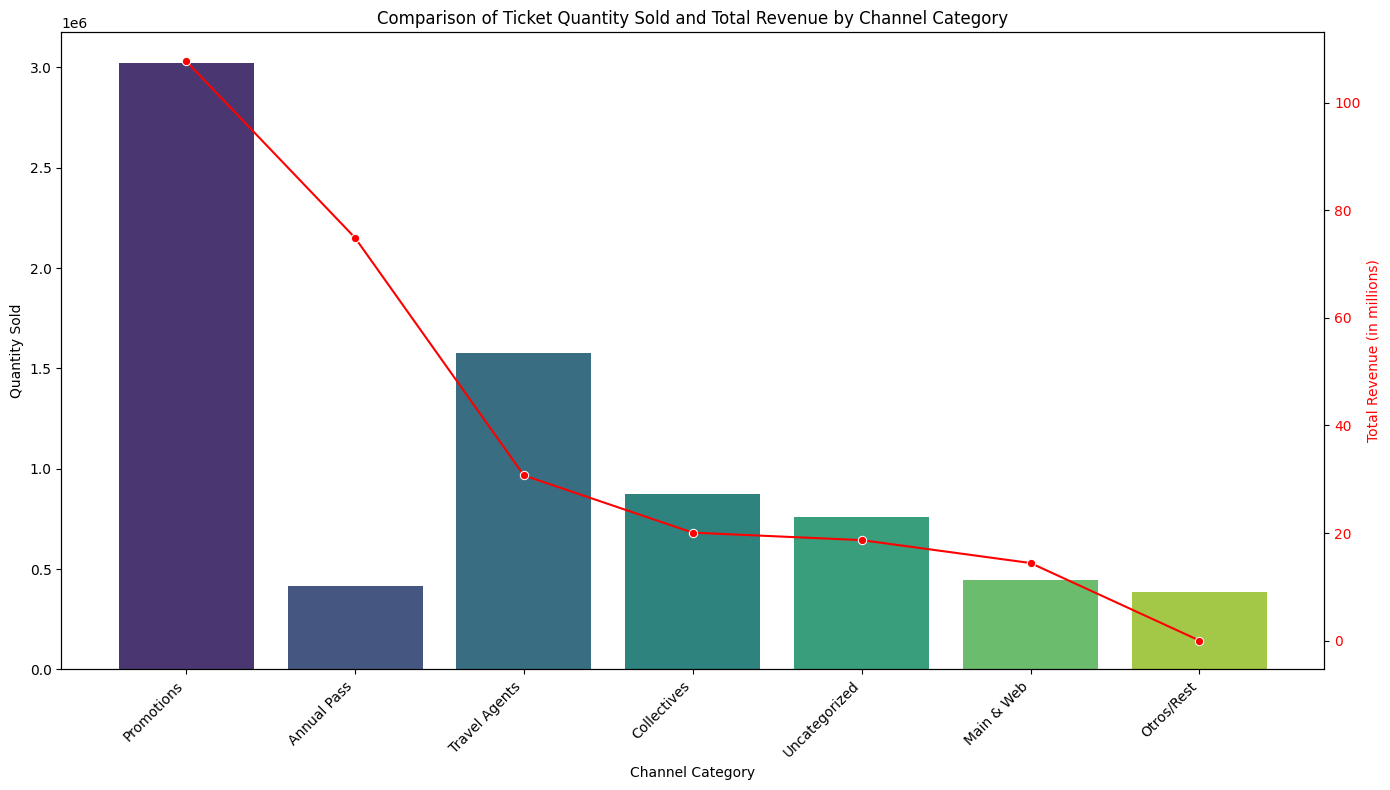

In [102]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for quantity sold, without palette (using default color)
sns.barplot(data=ticket_summary, x='ChannelCategory', y='quantitySold', palette='viridis', ax=ax1)
ax1.set_ylabel('Quantity Sold', color='black')
ax1.set_xlabel('Channel Category')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(False)

# Rotate x-axis labels using plt.xticks() to avoid UserWarning
plt.xticks(rotation=45, ha="right")

# Create a second y-axis for revenue
ax2 = ax1.twinx()

# Scale totalRevenue by 1e6 (to bring it to a similar scale as quantitySold)
sns.lineplot(data=ticket_summary, x='ChannelCategory', y=ticket_summary['totalRevenue'] / 1e6, color='red', marker='o', ax=ax2)

# Adjust second y-axis to match the scaling
ax2.set_ylabel('Total Revenue (in millions)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.grid(False)

# Set the title and show the legend
plt.title("Comparison of Ticket Quantity Sold and Total Revenue by Channel Category")
fig.tight_layout()
plt.show()

La hipótesis queda confirmada, ya que, aunque los pases anuales se venden en menor cantidad que las entradas con promoción o las vendidas a través de agencias de viajes, los ingresos generados por estos pases son considerablemente más altos.


### 4. **Comparación entre la compra de entradas On-line y la compra Off-line** <br>
Hipótesis: Después de COVID-19, la compra de entradas On-line ha aumentado significativamente.

In [103]:
purchase_comparison = visits_war.groupby(['iNumYear', 'sDesOnline']).agg(totalVisits=('mNumTicket', 'sum'), totalRevenue=('mAmtRevenueTicket', 'sum')).reset_index()

totals_per_year = purchase_comparison.groupby('iNumYear').agg(totalRevenue=('totalRevenue', 'sum'),totalVisits=('totalVisits', 'sum')).reset_index()

purchase_comparison = purchase_comparison.merge(totals_per_year, on='iNumYear', suffixes=('', '_Total'))

purchase_comparison['percentage'] = (purchase_comparison['totalRevenue'] / purchase_comparison['totalRevenue_Total']) * 100

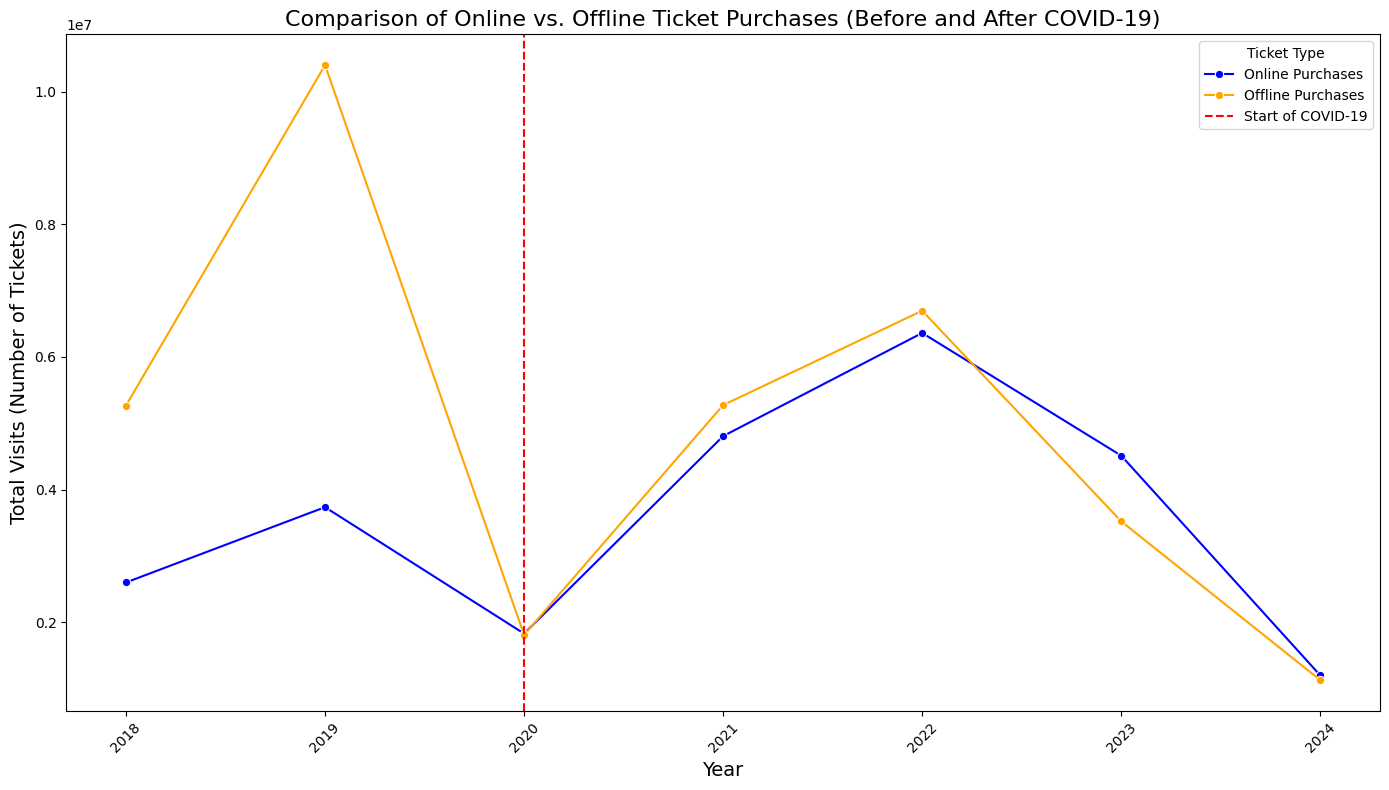

In [104]:
#Agrupar los datos por año y tipo de compra (Online vs On-Site) para obtener el total de tickets vendido
purchase_comparison = visits.groupby(['iNumYear', 'sDesOnline']).agg(totalVisits=('mNumTicket', 'sum')).reset_index()

# Pivotar los datos para tener las compras online y on-site en columnas separadas
purchase_pivot = purchase_comparison.pivot(index='iNumYear', columns='sDesOnline', values='totalVisits').fillna(0)

# Añadir una columna de "total" para ver las compras totales por año
purchase_pivot['total'] = purchase_pivot['On-line'] + purchase_pivot['Off-line']

# Graficar la comparación entre las compras online y on-site a lo largo de los años
plt.figure(figsize=(14, 8))
sns.lineplot(x=purchase_pivot.index, y=purchase_pivot['On-line'], label='Online Purchases', color='blue', marker='o')
sns.lineplot(x=purchase_pivot.index, y=purchase_pivot['Off-line'], label='Offline Purchases', color='orange', marker='o')

# Añadir una línea vertical para marcar el inicio de la pandemia (2020)
plt.axvline(x=2020, color='red', linestyle='--', label='Start of COVID-19')

# Añadir detalles y títulos
plt.title('Comparison of Online vs. Offline Ticket Purchases (Before and After COVID-19)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Visits (Number of Tickets)', fontsize=14)
plt.legend(title='Ticket Type')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar gráfico
plt.show()


Antes de la pandemia, los canales de venta Off-line dominaban claramente las transacciones. Sin embargo, a partir de 2020, debido al impacto del COVID-19, las ventas On-line comenzaron a ganar popularidad, llegando a un equilibrio del 50% - 50% entre ambos canales.

### 5. **Influencia de los canales de comercialización en la venta de entradas por Internet:** <br>
Ciertos canales de marketing (por ejemplo, Google, Facebook, búsqueda orgánica) impulsan mayores ventas de entradas en línea en comparación con otros, con campañas promocionales que conducen a picos de ventas.

Para ello vamos a hacer un análisis de la Métrica ROI:<br>
Evaluación por canal: Análisis desglosado por canal (Facebook Ads, Google Ads, etc.) para identificar cuáles son los más rentables. Si un canal tiene un ROI significativamente más alto que otros, esto indicará que es más eficiente y deberías considerar redirigir más presupuesto hacia él.

<u>Descripción de los canales de publicidad:</u>

**Google:**<br>

- **DV360 (Google Display & Video 360):** Plataforma de Google para gestionar anuncios gráficos y de video.<br>
- **DFA Campaigns (DoubleClick for Advertisers):** Solución integral para la gestión, publicación y seguimiento de campañas de publicidad digital.<br>
- **Google Ads:** Plataforma de Google para crear anuncios pagados que se muestran en los resultados de búsqueda y en sitios web asociados.<br>
<br><br>

**Facebook Ads:**

- **Instagram:** Publicidad en la red social de imágenes y videos.<br>
- **Facebook:** Publicidad en la plataforma social de Facebook.
<br><br>

**TikTok Ads:** Plataforma publicitaria de TikTok para promocionar contenido en la red social.
<br><br>

**Taboola:** Red publicitaria que coloca recuadros como "Around The Web" y "Recommended For You" en la parte inferior de diversas páginas web.
<br><br>

**Vidoomy:** Empresa especializada en publicidad en formato de video digital.
<br><br>

**Outbrain:** Plataforma global de publicidad que ayuda a conectar marcas con consumidores en la web abierta mediante recomendaciones de contenido.




In [107]:
google_ads_campaigns = paidmedia_war[paidmedia_war['sDesStage'] == 'Google Ads']
print(google_ads_campaigns)

      iIdCalendar  iIdSubpark  iIdCurrency  iIdStage  iIdPaidMediaChannel  \
0        20230101          29    202301034         7                    4   
3        20230102          29    202301034         7                   11   
4        20230102          29    202301034         7                    4   
9        20230103          29    202301034         7                   11   
10       20230103          29    202301034         7                   20   
...           ...         ...          ...       ...                  ...   
5182     20241022          29    202410034         7                    4   
5183     20241023          29    202410034         7                   22   
5185     20241023          29    202410034         7                    6   
5189     20241023          29    202410034         7                    4   
5190     20241023          29    202410034         7                   11   

      iNumImpressions  mAmtAdSpend  iNumSessions  iNumClicks  \
0          

In [109]:
# Creamos una columna ROI con la formula 
paidmedia_war['ROI'] = (paidmedia_war['mAmtNormalizedRevenue'] - google_ads_campaigns['mAmtAdSpend']) / paidmedia_war['mAmtAdSpend']

/var/folders/fp/1z3b5cy15gg6y5646dztcdfm0000gn/T/ipykernel_49637/1329217120.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=paidmedia_war, x='sDesStage', y='mAmtAdSpend', palette='viridis', ax=ax1)


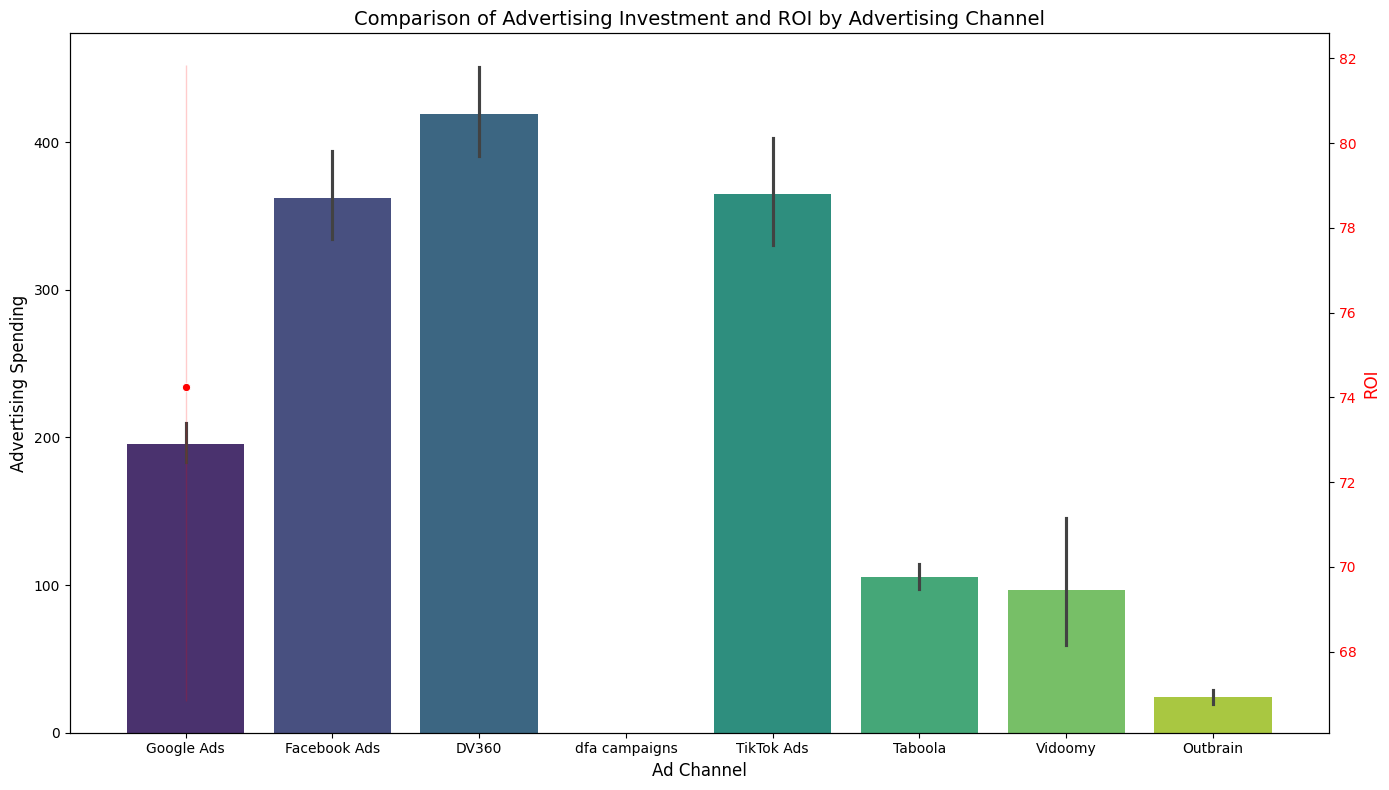

In [110]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# Gráfico de barras para mostrar el gasto en publicidad
sns.barplot(data=paidmedia_war, x='sDesStage', y='mAmtAdSpend', palette='viridis', ax=ax1)

# Establecer las etiquetas para el gráfico de barras
ax1.set_ylabel('Advertising Spending', fontsize=12)
ax1.set_xlabel('Ad Channel', fontsize=12)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title('Comparison of Advertising Investment and ROI by Advertising Channel', fontsize=14)

# Crear un segundo eje y para el gráfico de líneas (ROI)
ax2 = ax1.twinx()

# Gráfico de líneas para mostrar el ROI
sns.lineplot(data=paidmedia_war, x='sDesStage', y='ROI', color='red', marker='o', ax=ax2)

# Establecer las etiquetas para el gráfico de líneas (ROI)
ax2.set_ylabel('ROI', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Conclusión:** La distribución de la inversión en los diferentes canales es clave para entender si ciertos canales están recibiendo más presupuesto del que justifican sus resultados. Si un canal está siendo sobrealimentado sin generar los resultados esperados, es posible que se necesite redistribuir los recursos a otros canales con un ROI más alto.

Como se muestra en el gráfico comparativo de canales de publicidad, Google Ads tiene el retorno beneficio más alto en comparación con otros canales como Taboola, Outbrain o Vidoomy. Este hecho lo convierte en un canal clave a analizar, dado que tiene un peso considerable en el presupuesto destinado a la comercialización de entradas.

Pero podemos pensar que el hecho de que la inversión en Facebook Ads y TikTok Ads sea tan alta, puede sugerir una estrategia de posicionamiento de marca, a pesar de que el retorno directo de la inversión nos parezca a priori negativa.

En cuanto a dfa campaigns, no tenemos datos de que se haya invertido en publicidad por ese canal, pero sí que nos consta el retorno. 

### 6. **Fluctuación en el tiempo del ROI (Retorno de inversión) en el principal canal de venta de la publicidad de pago (Google Ads):**

El análisis del ROI de Google Ads en el tiempo es crucial para entender la efectividad de la inversión en este canal, ya que proporciona información sobre cómo la publicidad influye en las ventas de entradas por Internet. Este análisis puede ayudar a identificar tendencias, ajustes en la estrategia y optimización de recursos en función de los resultados obtenidos, lo cual es clave para maximizar el retorno de las inversiones publicitarias y mejorar las estrategias de comercialización.

In [111]:
#Vamos a seleccionar solo la inversión en Google Ads, y analizar el tipo de campañas que son más rentables en esta plataforma.
google_ads_df = paidmedia_war[paidmedia_war['sDesStage'] == 'Google Ads']

In [113]:
# Agrupar los datos por fecha y calcular el promedio de ROI
# Calculamos el ROI promedio para cada día.
google_ads_roi_time = google_ads_df.groupby('dDate').agg(
    total_ROI=('ROI', 'mean')
).reset_index()
print(google_ads_roi_time)


          dDate  total_ROI
0    2023-01-01        inf
1    2023-01-02      25.57
2    2023-01-03     106.30
3    2023-01-04      79.71
4    2023-01-05      37.60
..          ...        ...
656  2024-10-19      -1.00
657  2024-10-20       0.11
658  2024-10-21      -1.00
659  2024-10-22      -1.00
660  2024-10-23      -1.00

[661 rows x 2 columns]


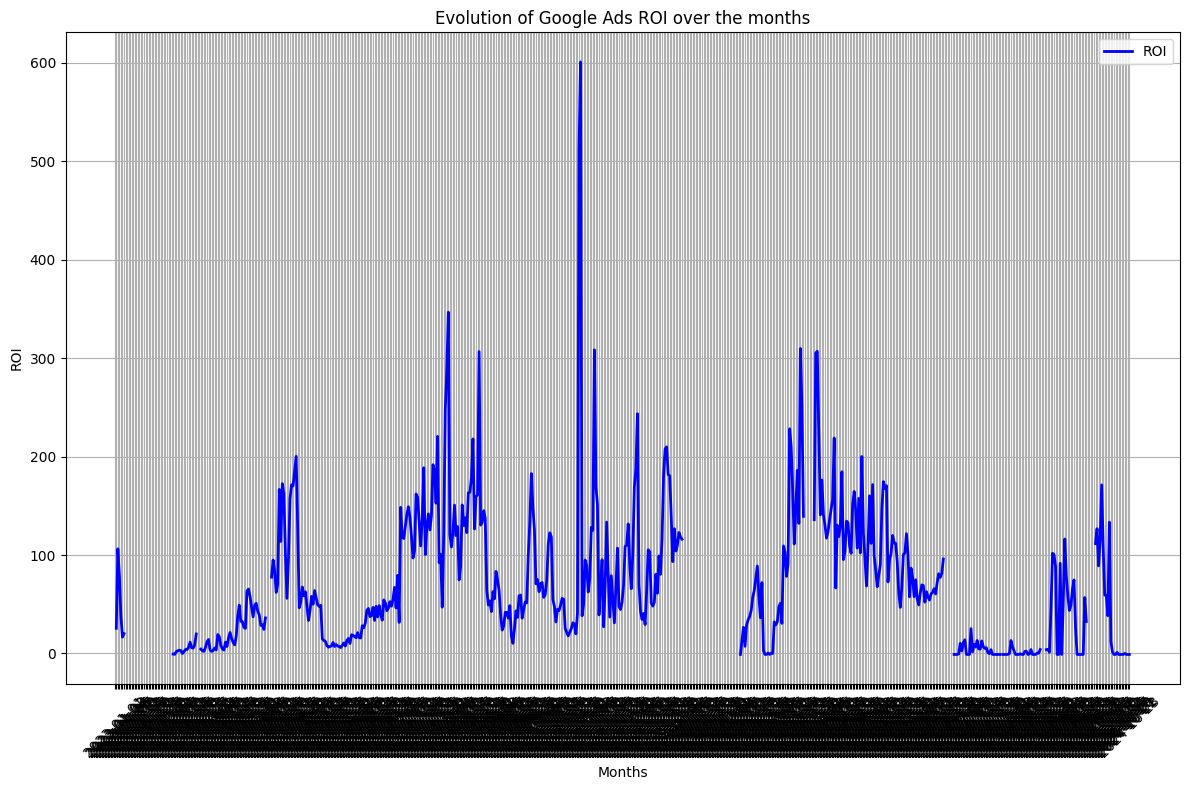

In [114]:
plt.figure(figsize=(12, 8))

# Línea para ROI
plt.plot(google_ads_roi_time['dDate'], google_ads_roi_time['total_ROI'], label='ROI', color='b', linewidth=2)

# Etiquetas y título
plt.title('Evolution of Google Ads ROI over the months')
plt.xlabel('Months')
plt.ylabel('ROI')
plt.legend(loc='best')
plt.grid(True)

# Mostrar gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Fluctuación extrema en el ROI:** Se observa una gran volatilidad en el ROI a lo largo del tiempo, con picos extremadamente altos en varios puntos. Esto puede indicar que hubo ciertas campañas que generaron altos ingresos en comparación con la inversión, pero también puede ser un indicio de que los datos contienen algunas anomalías o picos inusuales (por ejemplo, campañas con inversiones muy bajas pero retornos muy altos).
<br><br>

**Patrones de crecimiento:** A partir de mediados de 2023, parece haber un crecimiento general en el ROI, con una tendencia alcista hacia principios de 2024. Esto podría indicar que las campañas de Google Ads empezaron a ser más eficientes a medida que avanzaba el tiempo o que se mejoró la segmentación, la oferta de anuncios o la estrategia en general.
<br><br>

**Estacionalidad o eventos puntuales:** La presencia de fluctuaciones podría indicar que hay ciertas campañas estacionales o eventos específicos en los que se invierte más, lo que lleva a mayores retornos o menores según el rendimiento de la campaña. Ejem: El mes de noviembre, ese pico puede deberse a una campaña agresiva de Halloween. También tenemos que tener en cuenta el cierre del parque en las fechas entre enero y febrero, lo cual nos respondería a la falta de datos entre esas fechas.

### 7. **Análisis de las Mejores Campañas dentro de Google Ads:**
El objetivo de investigar las mejores campañas dentro de Google Ads es identificar qué factores contribuyeron a los altos rendimientos de inversión (ROI) observados en ciertos períodos. Al desglosar estas campañas de alto rendimiento, podremos descubrir:

In [115]:
# Agrupamos las columnas con las sumas que nos interesan.
google_ads_campaigns = google_ads_df.groupby('sDesPaidMediaChannel').agg(
    total_clicks=('iNumClicks', 'sum'),
    total_impressions=('iNumImpressions', 'sum'),
    total_spend=('mAmtAdSpend', 'sum'),
    total_transactions=('iNumNormalizedTransactions', 'sum'),
    total_revenue=('mAmtNormalizedRevenue', 'sum')
).reset_index()

In [116]:
# Calcular el porcentaje de inversión y porcentaje de ingresos para cada tipo de campaña
google_ads_campaigns['CTR'] = (google_ads_campaigns['total_clicks'] / google_ads_campaigns['total_impressions']) * 100
google_ads_campaigns['ROI'] = ((google_ads_campaigns['total_revenue'] - google_ads_campaigns['total_spend']) / google_ads_campaigns['total_spend']) * 100

# Ordenar los resultados por ROI en orden descendente
google_ads_campaigns = google_ads_campaigns.sort_values(by='ROI', ascending=False)

# Mostrar el DataFrame resultante
google_ads_campaigns

,sDesPaidMediaChannel,total_clicks,total_impressions,total_spend,total_transactions,total_revenue,CTR,ROI
0,Brand Paid Search,2098023,3696325,"69,193.68",59902,"7,260,003.37",56.76,"10,392.29"
2,Non-Brand Paid Search,143540,3366480,"110,463.64",7990,"1,036,634.28",4.26,838.44
1,Display,393991,32017458,"84,344.22",972,"154,004.20",1.23,82.59
6,Video,337798,57583508,"177,604.84",0,0.00,0.59,-100.00
3,Referral,0,0,0.00,0,0.00,NaN,NaN
4,Social Paid,0,0,0.00,0,0.00,NaN,NaN
5,Unknown,0,0,0.00,0,0.00,NaN,NaN


**Campañas más rentables (alto ROI):** La campaña Brand Paid Search tiene el ROI más alto, con un valor de 103.92, lo que indica que es la campaña más rentable en términos de ingresos generados por cada unidad de inversión. A pesar de representar solo 15.67% de la inversión total, genera el 85.91% de los ingresos, lo que resalta su eficiencia y éxito en la generación de ingresos.
<br><br>

**Campañas de bajo rendimiento:** La campaña Non-Brand Paid Search muestra un ROI de 8.38, lo que es positivo, pero mucho menor que el de Brand Paid Search. A pesar de su mayor porcentaje de inversión (25.01%), solo contribuye con 12.27% de los ingresos.
Las campañas de Display y Video presentan rendimientos mucho más bajos, con ROI cercanos a 0.83 y -1.00 respectivamente, lo que sugiere que, aunque se invirtió considerablemente en ellas (especialmente en Video, con 40.22% de la inversión), no han sido efectivas para generar ingresos, y la campaña Video incluso reporta pérdidas.

Viendo que la inversión de paid ads en la Warner empezó en 2023, vamos a estudiar si el impacto en la revenue
global ha sido mayor, ya que podemos sospechar, que la inversión direccionada a Tiktok, Facebook Ads y DV360(Google) está direccionada
a una estrategia de visibilidad de marca, ya que no se ha dejado de invertir sobre todo en las estaciones fuertes del negocio, pero no ha
traído un revenue como tal. 

### 8. **Investigación del Click Rate (CTR) de los Canales de Publicidad con más Inversión:**<br>
En este análisis, vamos a investigar el Click Rate (CTR) de los canales de publicidad con mayor inversión, concretamente Google Ads, Facebook Ads, TikTok Ads, y DV360. El objetivo principal es entender cómo la tasa de clics se comporta en estos canales y explorar si la estrategia publicitaria está enfocada principalmente en la generación de clics y creación de marca.

Aunque el ROI es positivo únicamente en Google Ads, donde los ingresos generados están justificando la inversión, se sigue destinando una parte significativa del presupuesto a Facebook Ads, TikTok Ads, y DV360. Esto puede indicar que, en estos canales, el enfoque no está necesariamente en la rentabilidad inmediata, sino más bien en aumentar la visibilidad de la marca o en estrategias de captación que, a largo plazo, podrían generar mayores beneficios.

In [117]:
# Filtrar solo los datos de los canales relevantes: Google Ads, Facebook Ads, DV360 y TikTok Ads
channels = ['Google Ads', 'Facebook Ads', 'DV360', 'TikTok Ads']
paidchannel_filtered = paidmedia_war[paidmedia_war['sDesStage'].isin(channels)]

In [118]:
# Calculamos el Click Rate (CTR) para cada canal
paidchannel_filtered.loc[:, 'CTR'] = (paidchannel_filtered['iNumClicks'] / paidchannel_filtered['iNumImpressions']) * 100

/var/folders/fp/1z3b5cy15gg6y5646dztcdfm0000gn/T/ipykernel_49637/4111950657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paidchannel_filtered.loc[:, 'CTR'] = (paidchannel_filtered['iNumClicks'] / paidchannel_filtered['iNumImpressions']) * 100


In [119]:
paidchannel_filtered

,iIdCalendar,iIdSubpark,iIdCurrency,iIdStage,iIdPaidMediaChannel,iNumImpressions,mAmtAdSpend,iNumSessions,iNumClicks,iNumTransactions,...,sDesPaidMediaChannel,sDesSubPark,iNumYear,sDesMonth,iNumMonth,sDayWeek,iNumDayOfYear,dDate,ROI,CTR
0,20230101,29,202301034,7,4,0,0.00,56,0,2,...,Brand Paid Search,Warner,2023,January,1,Sunday,1,2023-01-01,inf,NaN
1,20230101,29,202301034,5,20,0,0.00,152,0,5,...,Social Paid,Warner,2023,January,1,Sunday,1,2023-01-01,NaN,NaN
2,20230102,29,202301034,2,6,69616,119.52,23,141,0,...,Display,Warner,2023,January,1,Monday,2,2023-01-02,NaN,0.20
3,20230102,29,202301034,7,11,176,13.74,0,17,0,...,Non-Brand Paid Search,Warner,2023,January,1,Monday,2,2023-01-02,NaN,9.66
4,20230102,29,202301034,7,4,1037,117.78,446,464,22,...,Brand Paid Search,Warner,2023,January,1,Monday,2,2023-01-02,25.57,44.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5186,20241023,29,202410034,2,6,170688,384.09,63,793,0,...,Display,Warner,2024,October,10,Wednesday,297,2024-10-23,NaN,0.46
5187,20241023,29,202410034,19,20,239748,243.89,0,391,0,...,Social Paid,Warner,2024,October,10,Wednesday,297,2024-10-23,NaN,0.16
5188,20241023,29,202410034,5,20,593010,906.94,0,2573,0,...,Social Paid,Warner,2024,October,10,Wednesday,297,2024-10-23,NaN,0.43
5189,20241023,29,202410034,7,4,4077,29.85,1,2469,0,...,Brand Paid Search,Warner,2024,October,10,Wednesday,297,2024-10-23,-1.00,60.56


In [120]:
# Agrupamos las columnas con las sumas que nos interesan.
click_rate_analysis = paidchannel_filtered.groupby('sDesStage').agg(
    total_clicks=('iNumClicks', 'sum'),
    total_impressions=('iNumImpressions', 'sum'),
    total_spend=('mAmtAdSpend', 'sum'),
    total_transactions=('iNumNormalizedTransactions', 'sum'),
    total_revenue=('mAmtNormalizedRevenue', 'sum')
).reset_index()

In [121]:
click_rate_analysis['CTR'] = (click_rate_analysis['total_clicks'] / click_rate_analysis['total_impressions']) * 100
click_rate_analysis['ROI'] = ((click_rate_analysis['total_revenue'] - click_rate_analysis['total_spend']) / click_rate_analysis['total_spend']) * 100

In [122]:
click_rate_analysis

,sDesStage,total_clicks,total_impressions,total_spend,total_transactions,total_revenue,CTR,ROI
0,DV360,983657,192629232,"266,157.69",262,"38,445.03",0.51,-85.56
1,Facebook Ads,1338921,356339684,"371,155.85",2322,"261,945.69",0.38,-29.42
2,Google Ads,2973352,96663771,"441,606.38",68864,"8,450,641.85",3.08,"1,813.61"
3,TikTok Ads,442661,195840277,"189,015.17",45,"4,858.88",0.23,-97.43


In [124]:
# Convertimos la columna sDate en datetime
visits_war['dDate'] = pd.to_datetime(visits_war['dDate'],format='%Y-%m-%d')
paidmedia_war['dDate'] = pd.to_datetime(paidmedia_war['dDate'],format='%Y-%m-%d')

In [125]:
# Seleccionamos solo las filas con valor Online del dataframe visits_warner
pm_investiment_revenue = visits_war[visits_war['sDesOnline'] == 'On-line']

In [126]:
# Creamos un groupby con las columnas dDate y la suma del revenue Ticket
visits_ticket_revenue = (
    visits_war
    .groupby(visits_war['dDate'].dt.to_period('M'))
    .agg(revenue_ticket=('mAmtRevenueTicket', 'sum'))
    .reset_index()
)

In [127]:
# Creamos un groupby con las columnas dDate y la suma del gasto en Pais Media
paidmedia_spend = (
    paidmedia_war
    .groupby(paidmedia_war['dDate'].dt.to_period('M'))
    .agg(spend_amount=('mAmtAdSpend', 'sum'))
    .reset_index()
)

In [128]:
# Hacemos un merge de visits_ticket_revenue y paidmedia_spend
onlinerevenue_pmspend = pd.merge(
    visits_ticket_revenue,    
    paidmedia_spend,         
    on='dDate',             
    how='outer'               
)

In [129]:
# Creamos una nueva columna para que sea compatible
onlinerevenue_pmspend['dDate2'] = onlinerevenue_pmspend['dDate'].dt.to_timestamp()

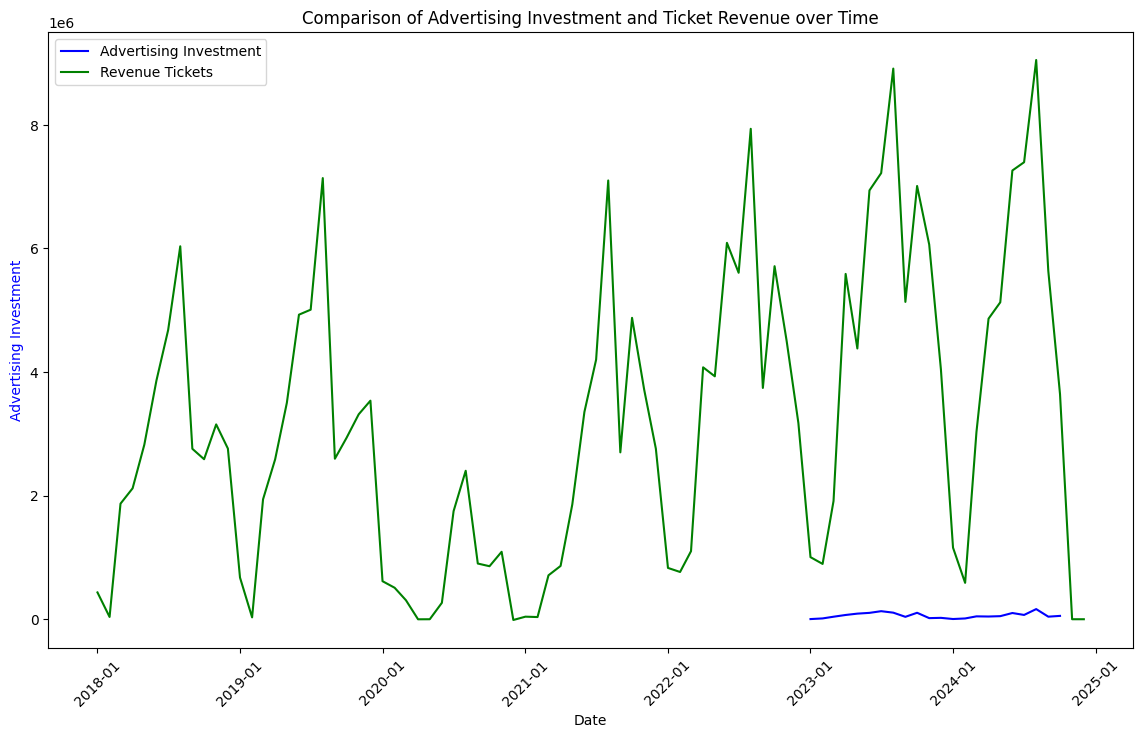

In [130]:
plt.figure(figsize=(14, 8))

# Set up the date format for the x-axis to show months and years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # %Y for year, %m for month

# Plotting the spend amount and revenue ticket lines
plt.plot(onlinerevenue_pmspend['dDate2'], onlinerevenue_pmspend['spend_amount'], color='blue', label='Advertising Investment')
plt.plot(onlinerevenue_pmspend['dDate2'], onlinerevenue_pmspend['revenue_ticket'], color='green', label='Revenue Tickets')

# Labeling x and y axes
plt.xlabel("Date")
plt.xticks(rotation=45)  # Rotate for better readability
plt.ylabel("Advertising Investment", color='blue')
plt.legend(loc="upper left")

# Remove grid lines
plt.grid(False)

# Title
plt.title("Comparison of Advertising Investment and Ticket Revenue over Time")
plt.show()